In [ ]:
#| hide
from nbdev import *

# Sampling statistics monitoring

> Monitoring of statistics of the generated sampling is possible using functions provided in the `hecss.monitor` module: `plot_stats` (for static plots) and `monitor_stats` (for "live" plots).

The two functions are essentially the same except for the *live* aspect. They display the energy distribution in the sample relative to the target distribution (determined by the temperature). The shaded areas indicate 1,2,3$\sigma$ intervals for the distribution. The fitted distribution is a gaussian curve fitted to the sample. The the data sets presented here are examples provided in the 
`example/VASP_3C-SiC_calculated/` directory of the source distribution. Refer to the `Setup` document for information about installation of the source distribution.

## Interpreting the statistics plot

The sampling statistics plots show a number of characteristics of the generated sample. The orange bell curve with green central line shows target energy distribution for a given temperature. The shaded orange regions indicate $\sigma, 2\sigma,$ and $3\sigma$ zones around this distribution.
The width of the standard deviation band is determined by the squere of the target distribution scaled to the size of the sample and number of bins in the histogram. The blue-shaded bars show population in each bin of the histogram and red dashed curve is a normal distribution fitted to the data points in the sample. In general, both bars of the histogram and fitted distribution should fit inside the $3\sigma$ band - such distribution should be considered a correct sampling of the target distribution. However, in small samples the statistical fluctuations are large and sometimes this condition is not met. In such cases the size of the variance of the actual bin of the histogram should be considered. This value is not plotted by default, but may be switched on with `sqrN=True` parameter to `plot_stats` function. The hi-lo bars on top of histogram bins indicate *one standard deviation* intervals around the value of the histogram bin. You have to judge for yourself when the dstribution is satisfactorily reproduced. In general $2\sigma$ bars of the target and the bin should overlap.

In [ ]:
from hecss.monitor import monitor_stats, plot_stats, load_dfset

## Single data plot

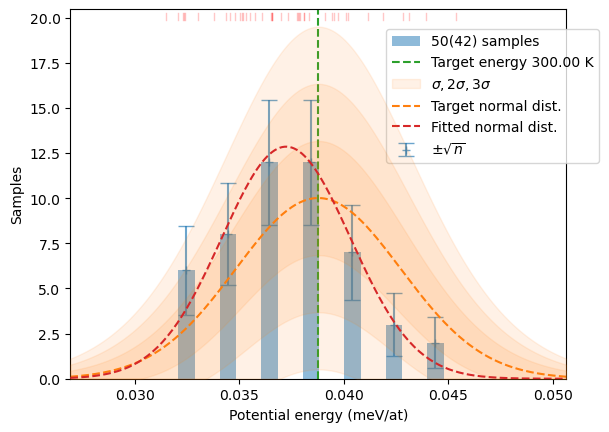

In [ ]:
T = 300
supercell = '2x2x2'
plot_stats(load_dfset(f'example/VASP_3C-SiC_calculated/{supercell}/T_{T:.0f}K/DFSET.dat'), 
           T=T, sqrN=True);

## Live plot

Here, presented with optional `once=True` argument making it run just once. If you want to actually monitor the calculation live you shoul omit this option.

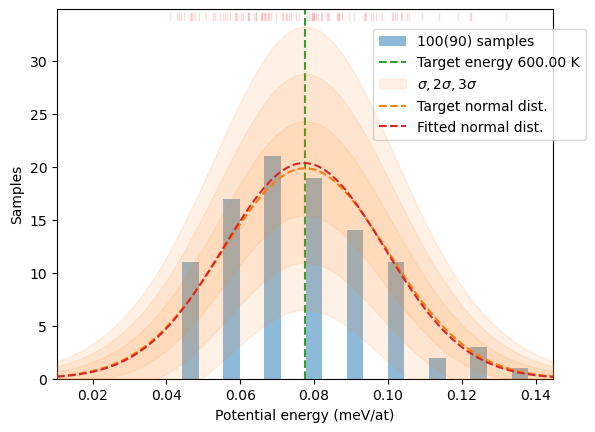

In [ ]:
#| interactive
T = 600
supercell = '1x1x1'
monitor_stats(T=T, 
              dfset=f'example/VASP_3C-SiC_calculated/{supercell}/T_{T:.0f}K/DFSET.dat',
              once=True # Show the plot and exit
             )

## Multiple plots

Example of multiple plots showing all pre-calculated data included in the source package. This example demonstrates how the `plot_stats` function may be used to build more complex figures (e.g. for 
inclusion in publication).

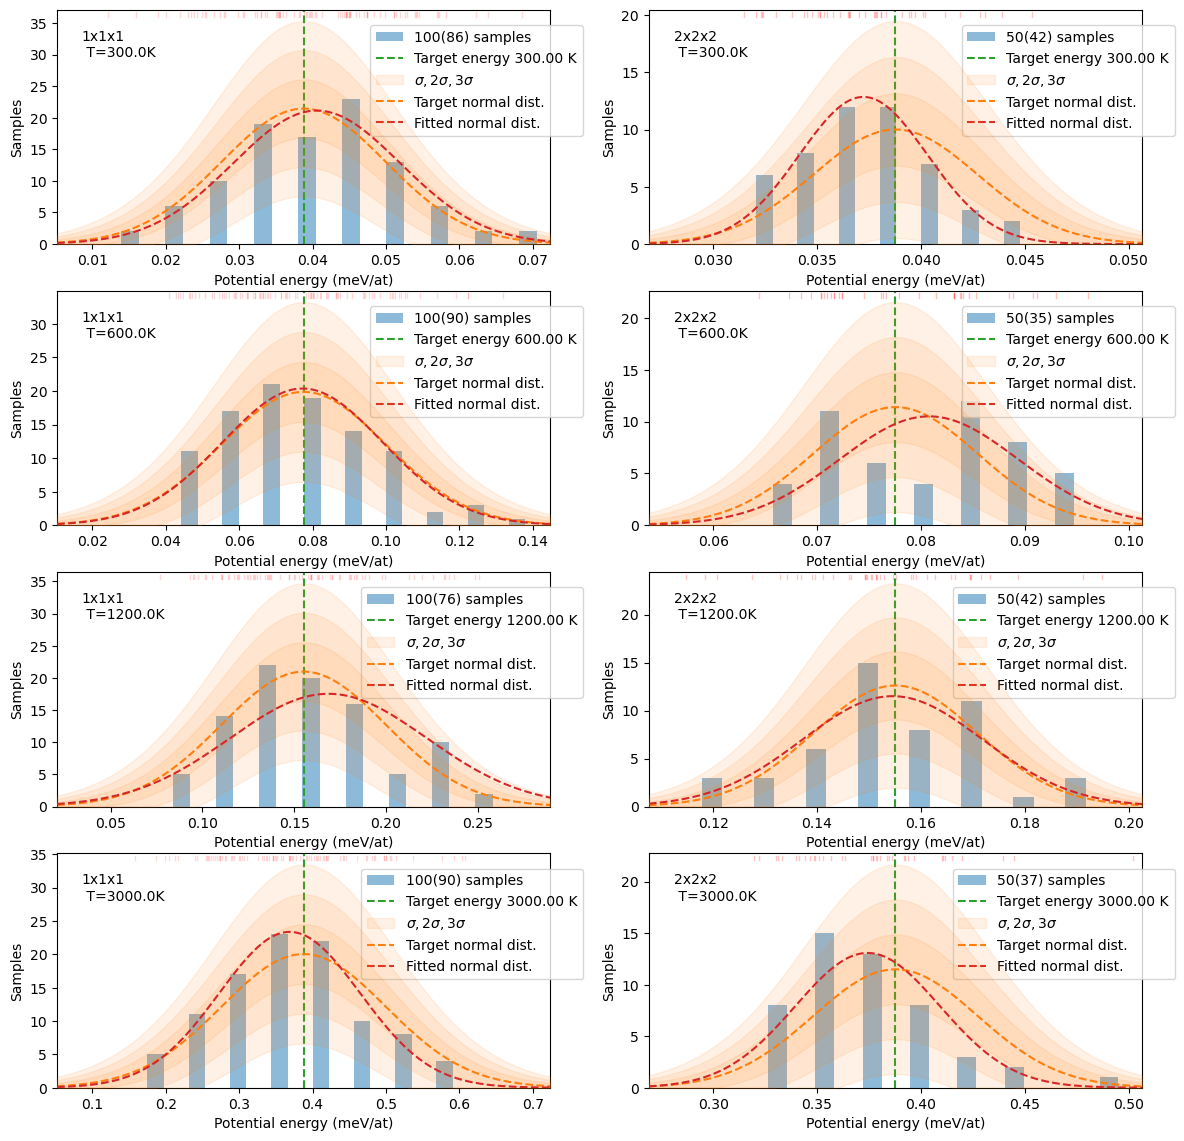

In [ ]:
from glob import glob
from matplotlib import pyplot as plt

fig, axs = plt.subplots(4,2, figsize=(14,14))

for n, d in enumerate(sorted(
                glob('example/VASP_3C-SiC_calculated/?x?x?/T_*K'), 
                key=lambda s: (s.split('/')[-2],float(s.split('/')[-1][2:-1])))):
    T=float(d.split('/')[-1][2:-1])
    sc = d.split('/')[-2]
    plt.sca(axs[n%4][n//4])
    plot_stats(load_dfset(f'{d}/DFSET.dat'), T=T, show=False)
    plt.text(0.05, 0.8, f'{sc}\n T={T}K', transform=plt.gca().transAxes)